In [72]:
using LinearAlgebra, Plots

function Wishart(n,m)
    X = randn(m,n)
    Hermitian(1/n * X' * X)
end

Wishart (generic function with 1 method)

Marchenko-Pastur

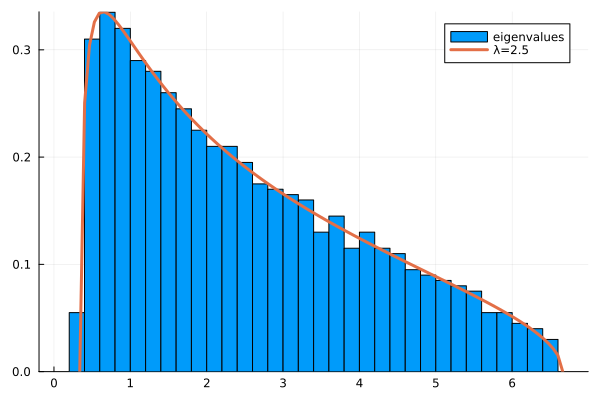

In [73]:
λ = 2.5
W = Wishart(N,Int(λ*N))
histogram(eigvals(W), bins=50, normalize=true, label="eigenvalues")
a = (1-√(λ))^2
b = (1+√(λ))^2
mpdensity(x) = a <= x <= b ? sqrt((x-a)*(b-x))/(2pi*x) : 0
plot!(range(a,b,100), mpdensity.(range(a,b,100)), linewidth = 3, label="λ=$λ")

Inverse Marchenko-Pastur

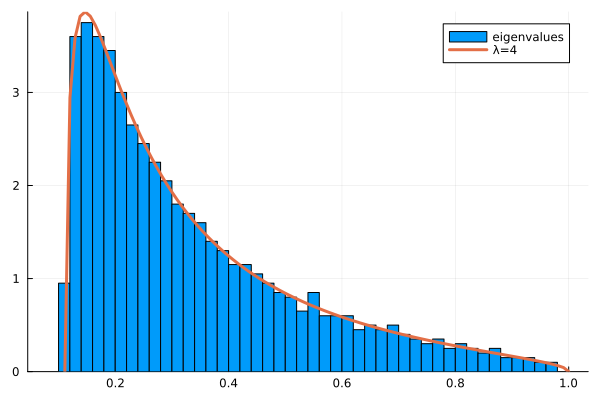

In [74]:
λ = 4
W = Wishart(N,Int(λ*N))
histogram(eigvals(inv(W)), bins=50, normalize=true, label="eigenvalues")

invmpdensity(x) = 1/b <= x <= 1/a ? 1/x^2 * mpdensity(1/x) : 0


a = (1-√(λ))^2
b = (1+√(λ))^2

plot!(range(1/b,1/a,100), invmpdensity.(range(1/b,1/a,100)), linewidth = 3, label="λ=$λ")

In [75]:
S(n,k) = Int(round(1/n * binomial(n, k+1) * binomial(n + k - 1, k)))
for n=1:8
    t = sum([S(n,k) for k=0:n-1])
    print("Row sum = $t          ")
    for k=0:n-1
        print(S(n,k))
        print("    ")
    end
    println()
end

Row sum = 1          1    
Row sum = 2          1    1    
Row sum = 6          1    3    2    
Row sum = 22          1    6    10    5    
Row sum = 90          1    10    30    35    14    
Row sum = 394          1    15    70    140    126    42    
Row sum = 1806          1    21    140    420    630    462    132    
Row sum = 8558          1    28    252    1050    2310    2772    1716    429    


In [ ]:
# computed moments
for n=1:5
    t = 0
    for k=0:n-1
        t += S(n,k) * (1/(λ-1))^k
    end
    println(t /(λ-1)^n)
end

0.3333333333333333
0.14814814814814814
0.0823045267489712
0.053040695016003656
0.037595894934715234


In [ ]:
# sampled moments
N=1000
W = Wishart(N,Int(λ*N))
for n=1:5
    println(tr(inv(W)^n)/N)
end

0.333494105692588
0.14853626397854908
0.08279171810995505
0.05354953068925293
0.03808678293998401


Wachter distribution

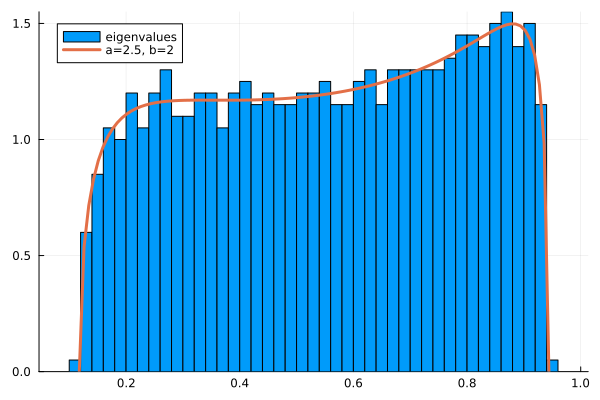

In [78]:
N=1000
a = 2.5
b = 2
W1 = Wishart(N,Int(a*N))
W2 = Wishart(N,Int(b*N))
V = W1*(W1+W2)^-1
histogram(eigvals(V), bins=50, normalize=true, label="eigenvalues")
l1 = (sqrt(a/(a+b) * (1-1/(a+b))) - sqrt(1/(a+b) * (1-a/(a+b))))^2
l2 = (sqrt(a/(a+b) * (1-1/(a+b))) + sqrt(1/(a+b) * (1-a/(a+b))))^2
wachterdensity(x) = l1 <= x <= l2 ? (a+b) * sqrt((x-l1)*(l2-x))/(2pi*x*(1-x)) : 0
plot!(range(l1,l2,100), wachterdensity.(range(l1,l2,100)), linewidth = 3, label="a=$a, b=$b")

In [79]:
B(n,k,l) = Int(binomial(n, k+l) * binomial(n, l-1) * binomial(n+k-1,k)/n)
for n=1:6
    println("n = $n")
    for k=0:n-1
        print("    k = $k      ")
        for l=1:k
            print("   ")
        end
        t = 0
        for l=1:n-k
            print(B(n,k,l))
            print("     ")
        end
        for l=1:k
            print("   ")
        end
        println()
    end
end

n = 1
    k = 0      1     
n = 2
    k = 0      1     1     
    k = 1         1        
n = 3
    k = 0      1     3     1     
    k = 1         3     3        
    k = 2            2           
n = 4
    k = 0      1     6     6     1     
    k = 1         6     16     6        
    k = 2            10     10           
    k = 3               5              
n = 5
    k = 0      1     10     20     10     1     
    k = 1         10     50     50     10        
    k = 2            30     75     30           
    k = 3               35     35              
    k = 4                  14                 
n = 6
    k = 0      1     15     50     50     15     1     
    k = 1         15     120     225     120     15        
    k = 2            70     315     315     70           
    k = 3               140     336     140              
    k = 4                  126     126                 
    k = 5                     42                    


In [ ]:
# computed moments
for n=1:5
    t = 0
    for k=0:n-1
        for l=1:n-k
            t += B(n,k,l) * (-a/(a+b))^k * a^l
        end
    end
    println(t /(a+b)^n)
end

0.5555555555555556
0.3635116598079561
0.26156243120120576
0.1992454895693449
0.15746199989954587


In [ ]:
# sampled moments
N=1000
W1 = Wishart(N,Int(a*N))
W2 = Wishart(N,Int(b*N))
V = W1*(W1+W2)^-1
for n=1:5
    println(tr(V^n)/N)
end

0.5553005825842677
0.3634255706841229
0.2616022218644713
0.19935801429924774
0.15761391550895743
